In [8]:
import shelve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
import statistics
from scipy.stats import skew 
from scipy.stats import ttest_ind
import math as m
import scipy.stats as st
plt.style.use('seaborn')
plt.style.use('seaborn-talk')
plt.style.use('seaborn-talk')

In [11]:
N = len(Y)

In [78]:
# Going list of parallel numpy arrays, parallel in the sense that all have the same number
# of rows, equal to the number of trials (202)
# 'Y's 
Y  # 1 or 0 for correct vs incorrect

# X's 

# each entry is from an anagram scenario

# SINGULAR VALUE entry rows
X_words  # number identifier of the word (corresponds to index of total_word_list)
X_wordlengths  # length of the word (either 5 or 6)
X_par  # participant ID number (1 through 29)
X_seqlengths # the length of the letter sequence data  
X_timelengths # the number of seconds of each trial
X_propvowel # the proportion of the letter sequence data that was vowels

X_loc_all # the average location as a percentage of the way through for each category of bigram
X_loc_first
X_loc_second
X_loc_third
X_loc_fourth
X_loc_final


# ARRAY entry rows
# (each entry represents an anagram scenario)
X_letterseq # letter sequence data (sub L)
X_vowels # vowel sequence data 1 if vowel, otherwise 0 (sub L)
X_order # number representing the number letter in the word (sub L)
X_position # the position on the screen - middle left clockwise (sub L)

X_ones  # 1 for each in-sequence (in the word) letter to letter read, else 0. (sub L - 1)
X_ones_first # (sub L - 1)
X_ones_second # (sub L - 1)
X_ones_third # (sub L - 1)
X_ones_fourth # (sub L - 1)
X_ones_final

X_bigrams  # each bigram read by the participant. (sub L - 1)
X_trigrams # (sub L - 2)
X_fourgrams # (sub L - 3)
X_fivegrams # (sub L - 4)


# miscellaneous, gives the number of bigrams for each category of bigram
first_sizes
second_sizes
third_sizes
fourth_sizes
final_sizes
all_sizes

In [54]:
# sub length L arrays
for i in range(N):
    assert(len(X_letterseq[i]) == len(X_vowels[i]) == len(X_order[i]) == len(X_position[i]))

# sub length L - 1 arrays
for i in range(N):
    assert(len(X_ones[i]) == len(X_ones_first[i]) == len(X_ones_final[i]) == len(X_bigrams[i]))


## In-word bigrams average locations

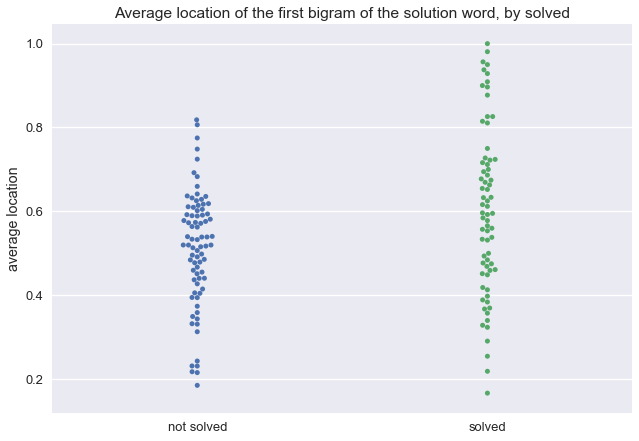

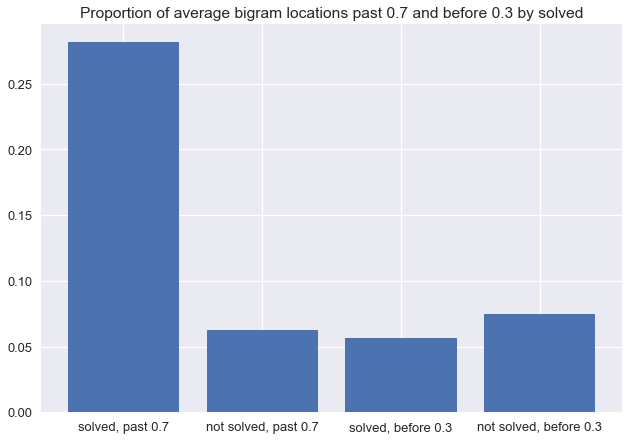

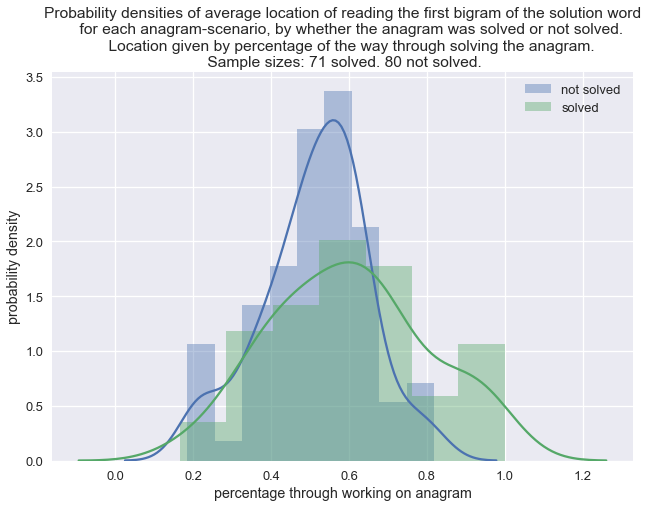

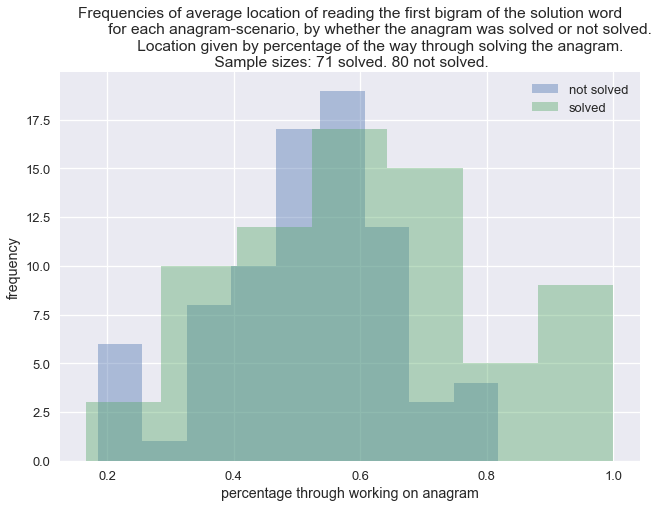

FOR NOT SOLVED
Average 0.5135866235940603
Median 0.5262162420992147
St.Dev 0.13635711777453252
Skewness -0.3503290340016885

Average number of ones: 7.1

FOR SOLVED
Average 0.6011514480807448
Median 0.5952380952380952
St.Dev 0.19962668686504115
Skewness 0.118584604768657

Average number of ones: 3.408450704225352


In [15]:
first = give_info_locs(X_loc_first, first_sizes, 'the first')

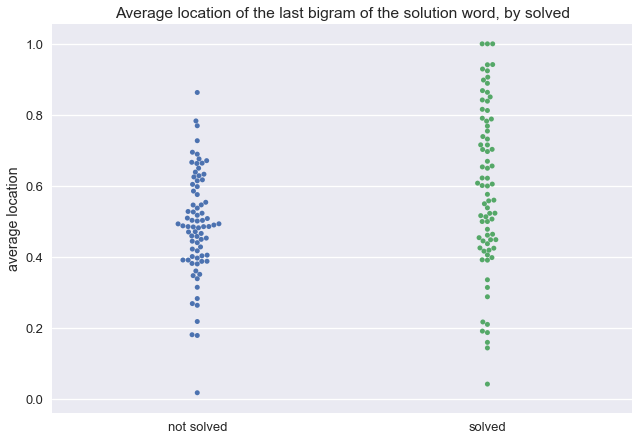

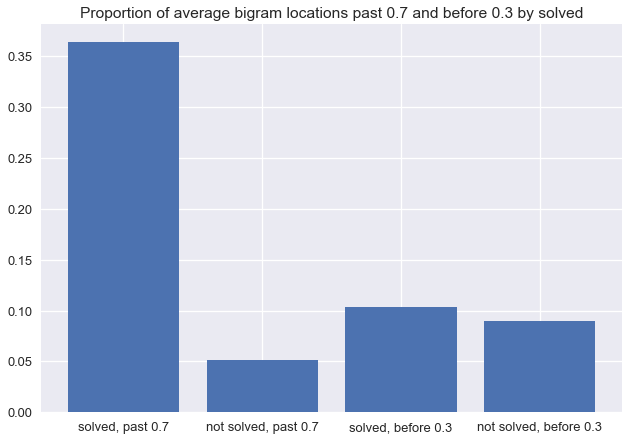

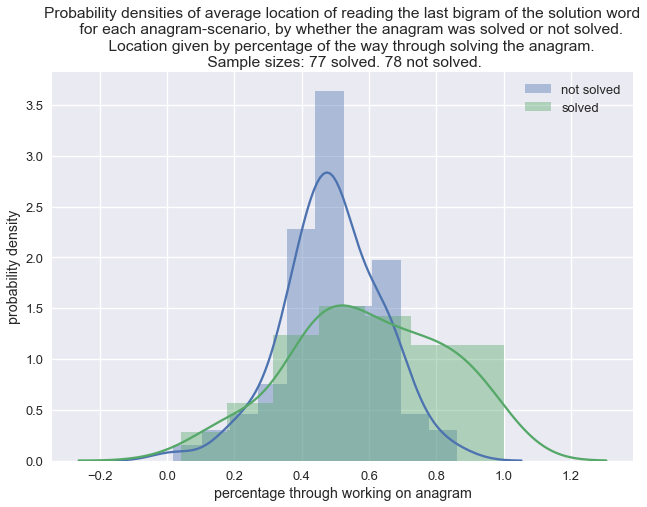

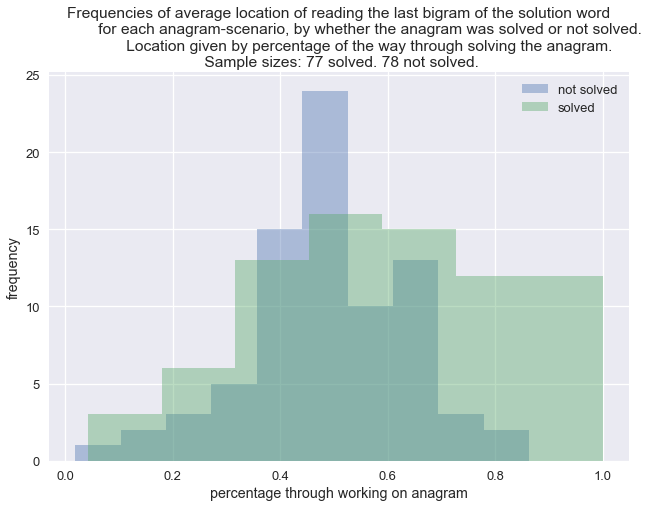

FOR NOT SOLVED
Average 0.49078340563528927
Median 0.4869142415890906
St.Dev 0.14673207827902424
Skewness -0.2666247821882029

Average number of ones: 6.102564102564102

FOR SOLVED
Average 0.5957685356971487
Median 0.6
St.Dev 0.22916917160504366
Skewness -0.16788458181308602

Average number of ones: 2.9740259740259742


In [20]:
last = give_info_locs(X_loc_final, final_sizes, 'the last')

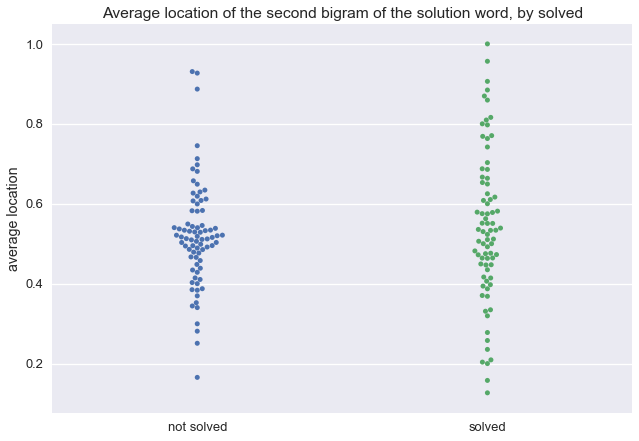

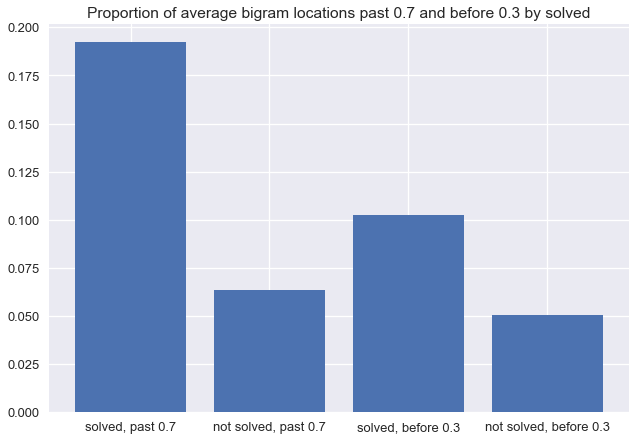

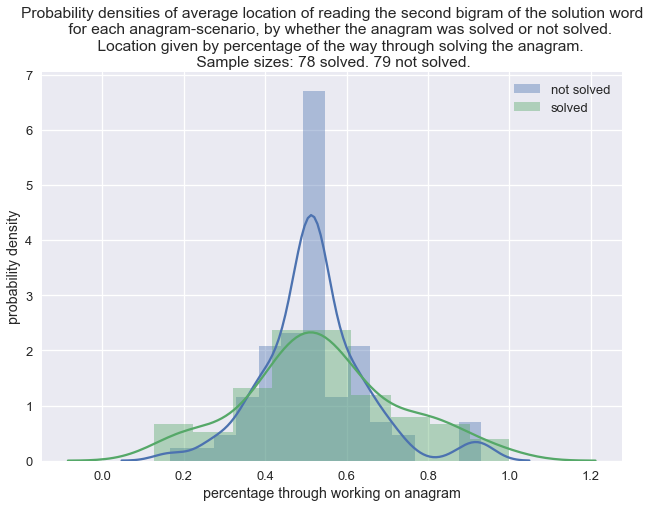

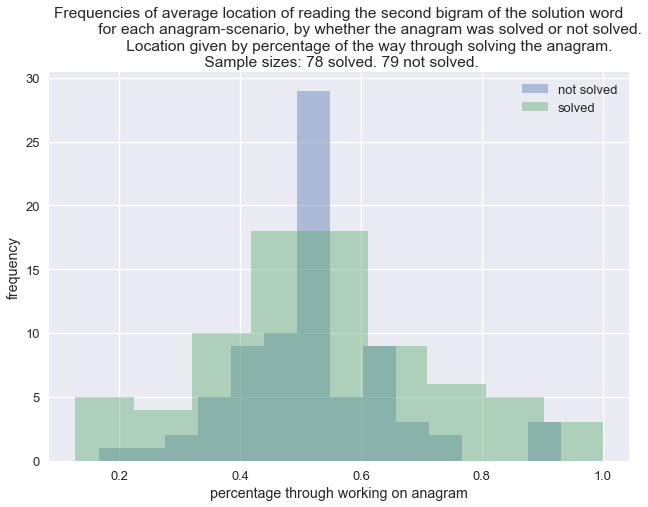

FOR NOT SOLVED
Average 0.5206203539452217
Median 0.5157232704402516
St.Dev 0.13115675313875994
Skewness 0.6039200658566486

Average number of ones: 7.8734177215189876

FOR SOLVED
Average 0.5408907117038654
Median 0.5318181818181817
St.Dev 0.18978136905238163
Skewness 0.1713267702300143

Average number of ones: 4.4743589743589745


In [21]:
second = give_info_locs(X_loc_second, second_sizes,'the second')

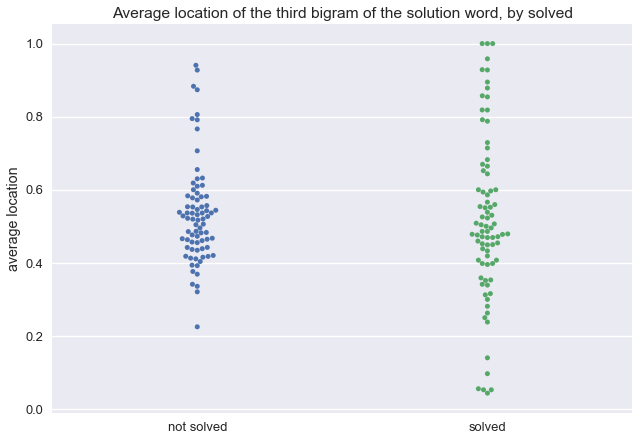

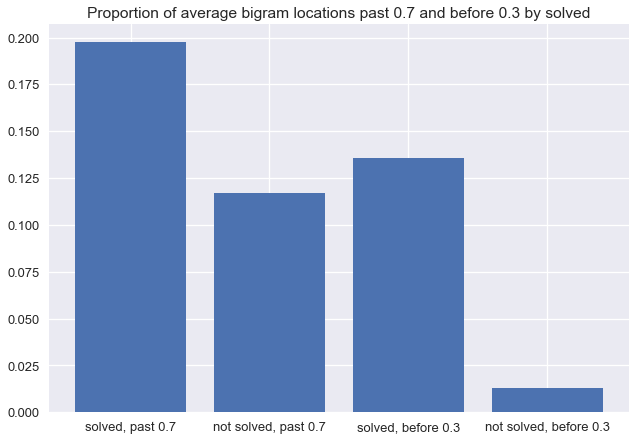

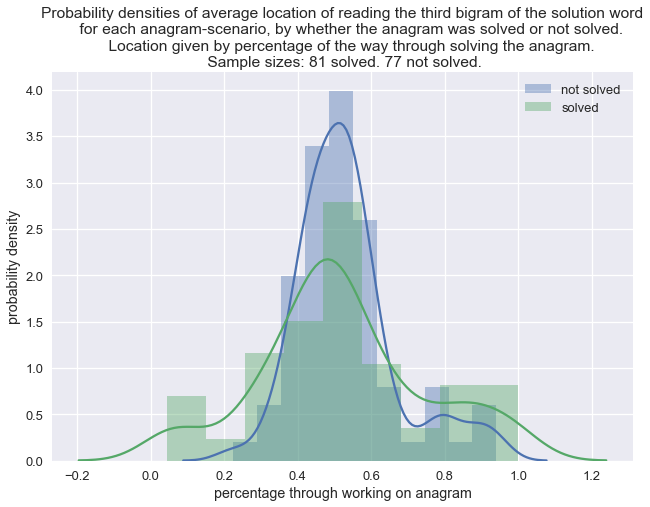

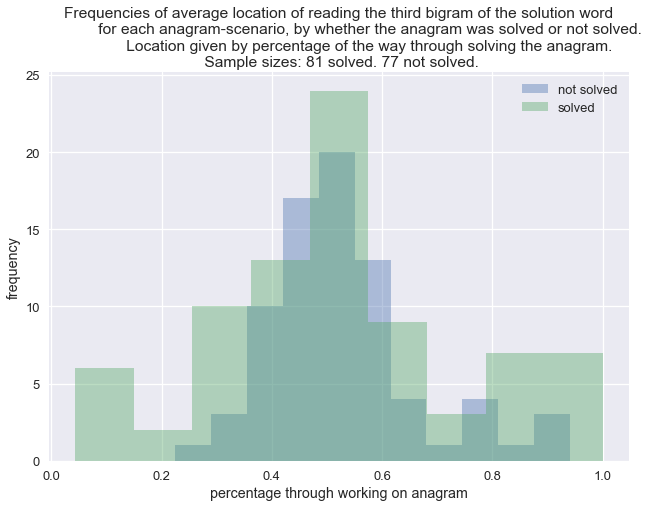

FOR NOT SOLVED
Average 0.5325652280841053
Median 0.5201773835920177
St.Dev 0.13735993400905833
Skewness 1.0550357910020152

Average number of ones: 7.935064935064935

FOR SOLVED
Average 0.5201929784491586
Median 0.4861111111111111
St.Dev 0.22777173618008137
Skewness 0.17842469454726254

Average number of ones: 4.049382716049383


In [22]:
third = give_info_locs(X_loc_third, third_sizes, 'the third')

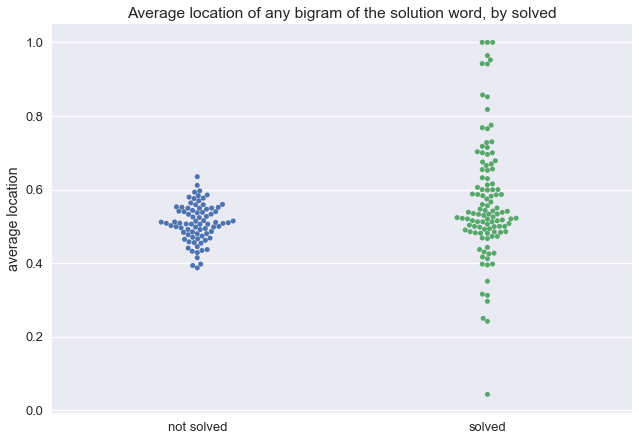

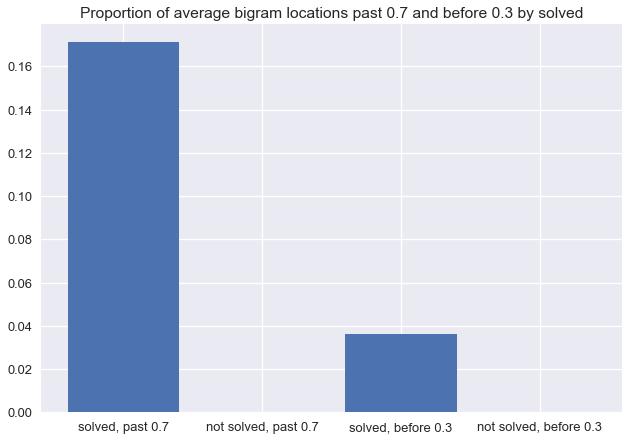

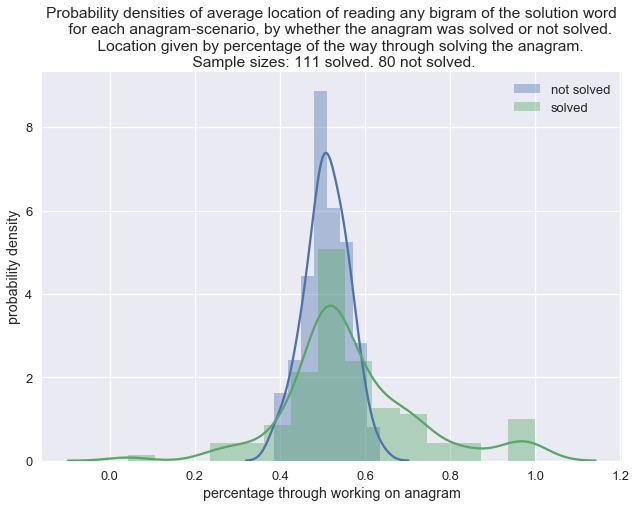

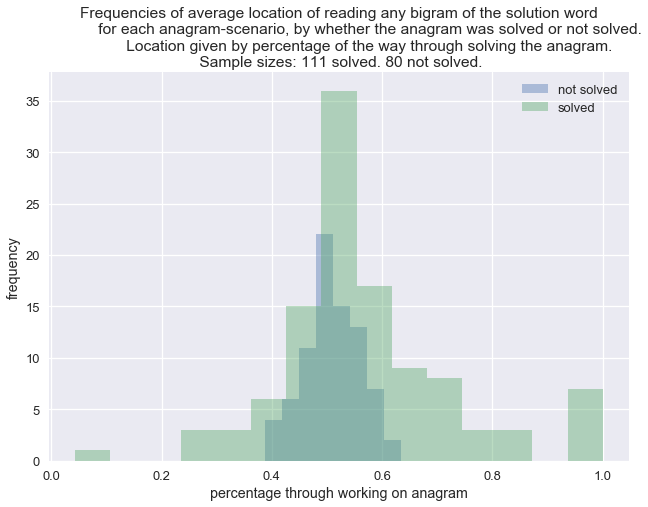

FOR NOT SOLVED
Average 0.5095806198697884
Median 0.508640351583016
St.Dev 0.05112945750899119
Skewness -0.15862351934881952

Average number of ones: 36.325

FOR SOLVED
Average 0.5692575901678627
Median 0.5337014470677837
St.Dev 0.1619648128523294
Skewness 0.5379791124827713

Average number of ones: 11.252252252252251


In [23]:
any_all = give_info_locs(X_loc_all, all_sizes, 'any')

In [24]:
bigram_position = ['any', 'last', 'third', 'second', 'first']
bigram_list = [any_all, last, third, second, first]
def list_order(index, in_list):
    return [element[index] for element in in_list]
    
avg_loc_not_solved = list_order(1, bigram_list)
avg_loc_solved = list_order(0, bigram_list)
sd_loc_not_solved = list_order(3, bigram_list)
sd_loc_solved = list_order(2, bigram_list)
error_solved = list_order(4, bigram_list)
error_not_solved = list_order(5, bigram_list)


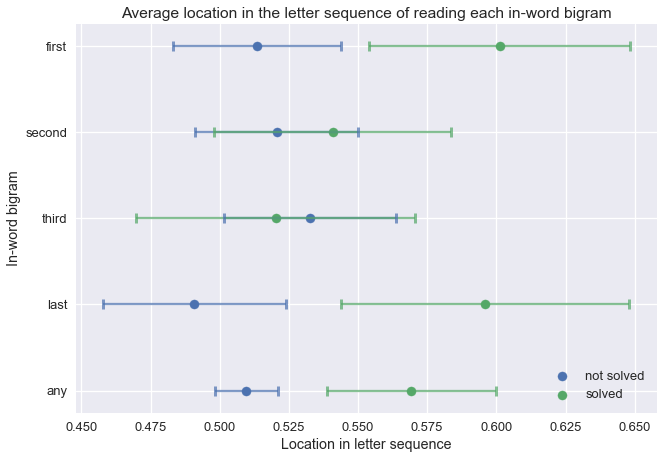

In [25]:
plt.scatter(avg_loc_not_solved, bigram_position)

plt.errorbar(x=avg_loc_not_solved, y=bigram_position, xerr=error_not_solved, linestyle='', \
            alpha=0.7, capsize=5, capthick=3)
plt.scatter(avg_loc_solved, bigram_position)
plt.errorbar(x=avg_loc_solved, y=bigram_position, xerr=error_solved, linestyle='', \
             alpha=0.7, capsize=5, capthick=3)
plt.title('Average location in the letter sequence of reading each in-word bigram')
plt.legend(['not solved', 'solved'])
plt.xlabel('Location in letter sequence')
plt.ylabel('In-word bigram')
plt.savefig('bigram_locations.png', dpi=300)
plt.show()

In [29]:
print(bigram_position)
print('The p values betwen solved and not solved:')
print(list_order(6, bigram_list))

['any', 'last', 'third', 'second', 'first']
The p values betwen solved and not solved:
[0.00019288105107490892, 0.0004610729463023297, 0.33912749816248644, 0.21906931623412146, 0.00117241048731084]


In [45]:
solved_prop_first = list()
not_solved_prop_first = list()
for i in range(N):
    if Y[i] == 1:
        solved_prop_first.append(sum(X_ones_first[i]) / len(X_ones_first[i]))
    elif Y[i] == 0:
        not_solved_prop_first.append(sum(X_ones_first[i]) / len(X_ones_first[i]))

Rate of reading the first in-word bigram doesn't seem to be different

In [47]:
print('solved', sum(solved_prop_first) / len(solved_prop_first))
print('not solved', sum(not_solved_prop_first) / len(not_solved_prop_first))

solved 0.02505724803051314
not solved 0.02582928645603258


## Time it takes to solve

In [30]:
five_solved_timelengths, six_solved_timelengths, five_not_solved_timelengths, \
six_not_solved_timelengths = by_solved_and_wordlength(X_timelengths)

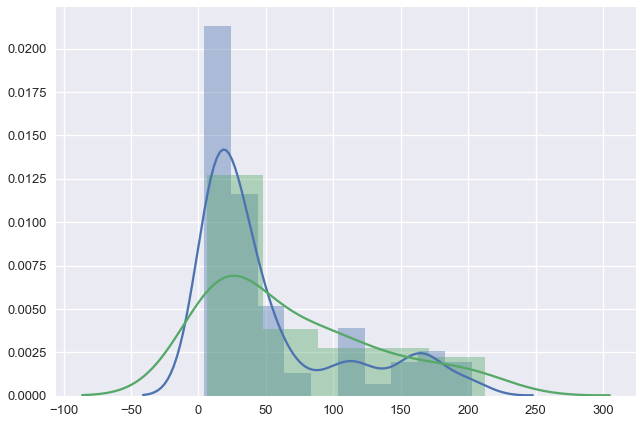

In [31]:
# sns.distplot(not_solved_timelengths)
sns.distplot(five_solved_timelengths)
sns.distplot(six_solved_timelengths)

In [43]:
statJM(five_solved_timelengths)

Average 52.600705128205135
Median 26.8965
St.Dev 55.86764751360244
Skewness 1.3449073352194727


In [44]:
statJM(six_solved_timelengths)

Average 69.9123181818182
Median 44.325
St.Dev 62.18615895233636
Skewness 0.8736904573931882


In [32]:
len(five_solved_timelengths), len(five_not_solved_timelengths)

(78, 12)

In [33]:
# proportion of five letter words that were solved
78 / (78 + 12)

0.8666666666666667

In [34]:
len(six_solved_timelengths), len(six_not_solved_timelengths)

(44, 68)

In [35]:
# proportion of six letter words that were solved 
44 / (44 + 68)

0.39285714285714285

In [37]:
count = 0
for a in five_solved_timelengths:
    if a < 60:
        count += 1

count / len(five_solved_timelengths)

0.7435897435897436

The proportion of 5 letter words would be correct if we stopped participants at 60 seconds

In [56]:
0.7435 * 0.86667

0.6443691450000001

In [40]:
# Number of trials per participant
202 / 27

7.481481481481482

In [415]:
across_titles = ['the first', 'the last', 'any', 'the second', 'the third']

In [416]:
ones_list = [X_ones_first, X_ones_final, X_ones, X_ones_second, X_ones_third]

71 solved, 80 not solved.



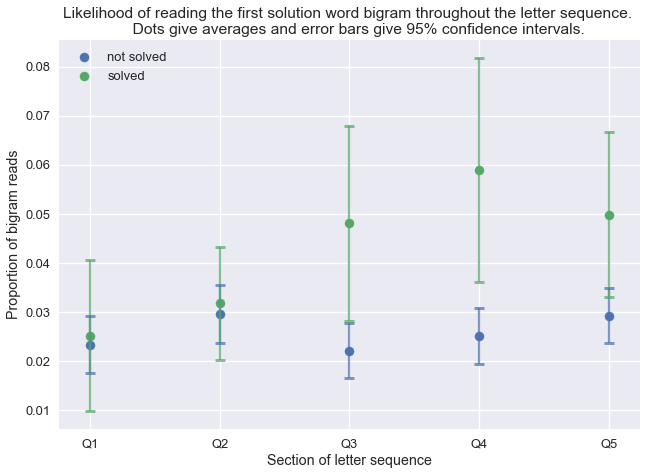




77 solved, 78 not solved.



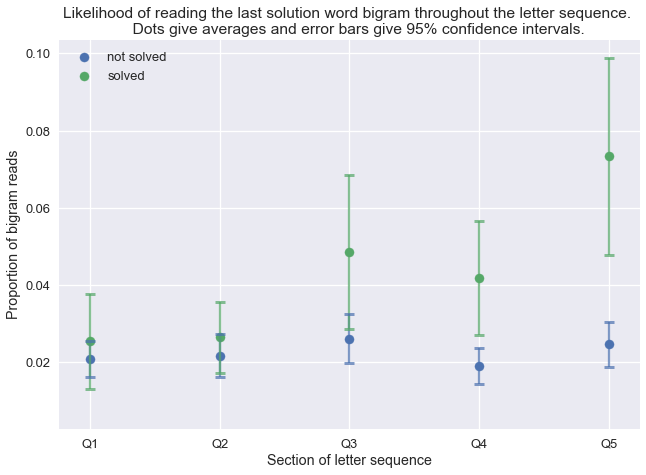




111 solved, 80 not solved.



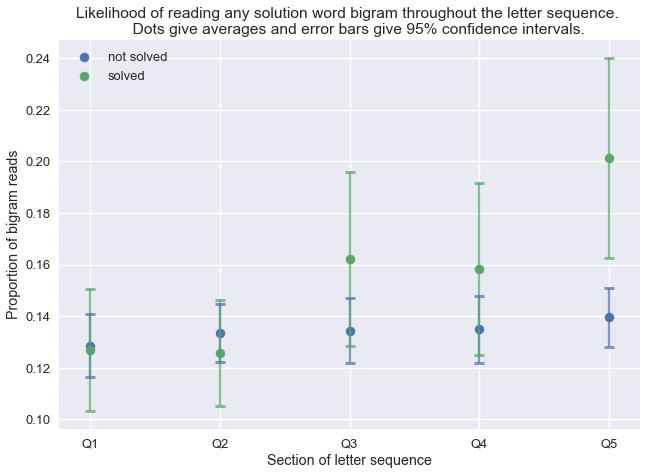




78 solved, 79 not solved.



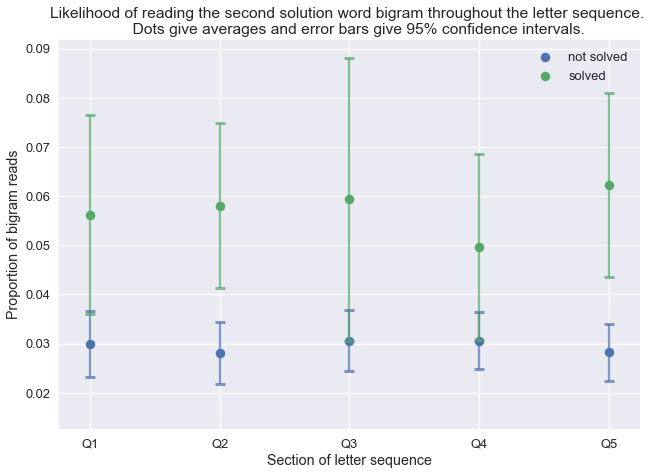




81 solved, 77 not solved.



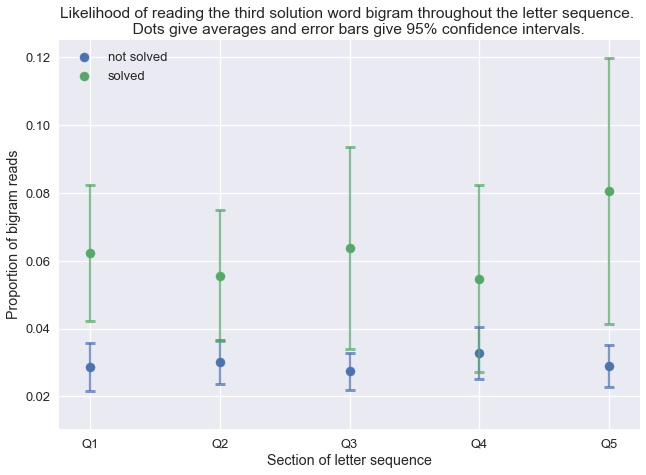

In [424]:
for i in range(len(ones_list)):
    ones_across_sequence(ones_list[i], 5, across_titles[i])
    print('\n\n')

1 were too short
71 solved, 80 not solved.



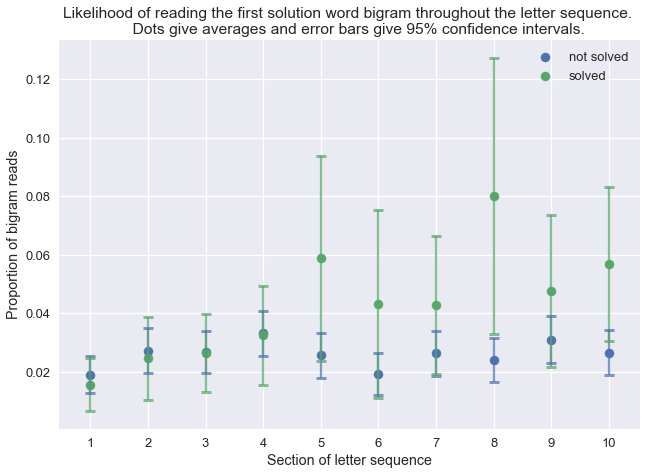




77 solved, 78 not solved.



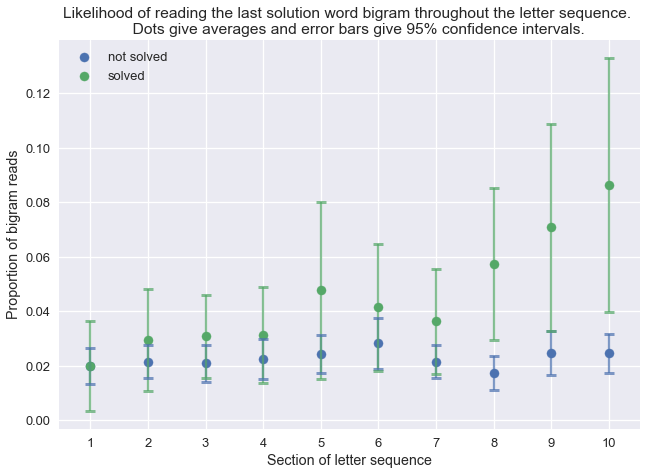




5 were too short
111 solved, 80 not solved.



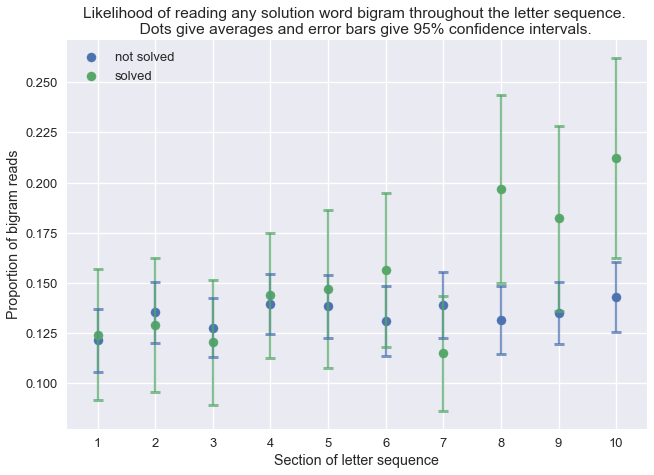




1 were too short
78 solved, 79 not solved.



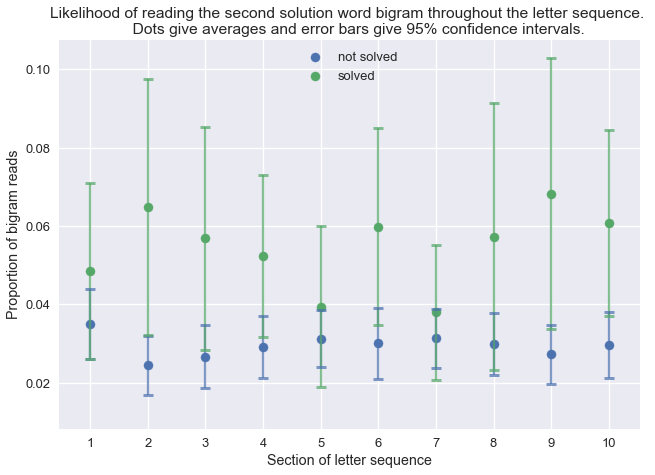




4 were too short
81 solved, 77 not solved.



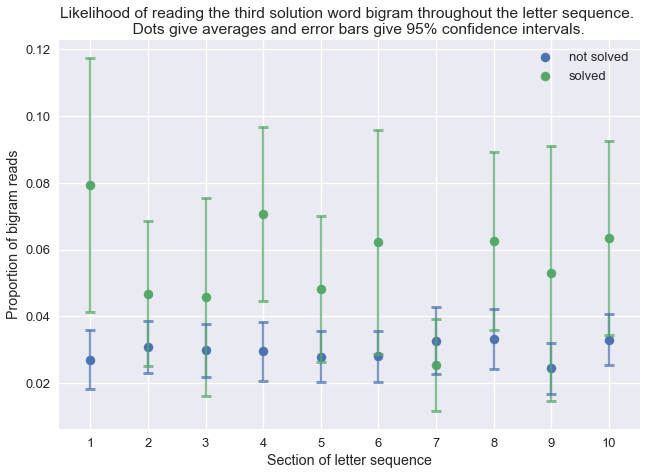

In [425]:
for i in range(len(ones_list)):
    ones_across_sequence(ones_list[i], 10, across_titles[i])
    print('\n\n')

In [423]:
def ones_across_sequence(ones_array, num_splits, title_denoter):
    s_splits, ns_splits = split_ones(ones_array, num_splits)
    s_info = sum_splits(s_splits)
    ns_info = sum_splits(ns_splits)

    if num_splits == 5:
        groups = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
    else:
        groups = [str(i) for i in range(1, num_splits + 1)]
    print(len(s_splits), 'solved,', len(ns_splits), 'not solved.')
    print()
    plt.title('Likelihood of reading ' + title_denoter + ' solution word bigram throughout the letter sequence. \n\
    Dots give averages and error bars give 95% confidence intervals.')
    plt.xlabel('Section of letter sequence')
    plt.ylabel('Proportion of bigram reads')
    plt.scatter(groups, ns_info[0])
    plt.scatter(groups, s_info[0])
    plt.errorbar(x=groups, y=ns_info[0], yerr=ns_info[1], linestyle='', \
                alpha=0.7, capsize=5, capthick=3)
    plt.errorbar(x=groups, y=s_info[0], yerr=s_info[1], linestyle='', \
                alpha=0.7, capsize=5, capthick=3)
    plt.legend(['not solved', 'solved'])
    plt.show()
    
    
def split_ones(ones_array, num_splits):
    s_splits = list()
    ns_splits = list()
    for i in range(N):
        if 1 in ones_array[i]:
            split = np.array_split(ones_array[i], num_splits)
            if Y[i] == 1:
                s_splits.append(np.array(split))
            elif Y[i] == 0:
                ns_splits.append(np.array(split))
    return s_splits, ns_splits


def sum_splits(splits):
    num_splits = len(splits[0])
    split_vector = list()
    for i in range(num_splits):
        split_vector.append([])
    too_short = 0
    for split_array in splits:
        go_ahead = True
        for i in range(num_splits):
            if go_ahead:  # check if there's an empty array
                if len(split_array[i]) == 0:
                    too_short += 1
                    go_ahead = False
        if go_ahead:  # if no empty array, go ahead and add to split_vector
            for i in range(num_splits):
                prop = sum(split_array[i]) / len(split_array[i])
                split_vector[i].append(prop)
    avgs = [average_list(props) for props in split_vector]
    confs = [conf_error(props) for props in split_vector]
    if too_short != 0:
        print(too_short, 'were too short')
    return avgs, confs


def conf_interval(a_list):
    return st.t.interval(0.95, len(a_list)-1, \
                                        loc=np.mean(a_list), \
                                        scale=st.sem(a_list))

def conf_error(a_list):
    return conf_interval(a_list)[1] - average_list(a_list)

In [ ]:
def by_solved(X_data):
    solved_data = list()
    not_solved_data = list()
    for i in range(N):
        if Y[i] == 1:
            solved_data.append(X_data[i])
        elif Y[i] == 0:
            not_solved_data.append(X_data[i])
    return solved_data, not_solved_data


def by_wordlength(X_data):
    five_data = list()
    six_data = list()
    for i in range(N):
        if X_wordlengths[i] == 5:
            five_data.append(X_data[i])
        elif X_wordlengths[i] == 6:
            six_data.append(X_data[i])
    return five_data, six_data


def by_solved_and_wordlength(X_data):
    five_solved = list()
    six_solved = list()
    five_not_solved = list()
    six_not_solved = list()
    for i in range(N):
        if X_wordlengths[i] == 5:
            if Y[i] == 1:
                five_solved.append(X_data[i])
            elif Y[i] == 0:
                five_not_solved.append(X_data[i])
        elif X_wordlengths[i] == 6:
            if Y[i] == 1:
                six_solved.append(X_data[i])
            elif Y[i] == 0:
                six_not_solved.append(X_data[i])
    return five_solved, six_solved, five_not_solved, six_not_solved


def give_info_locs(locs, sizes, title_denoter, sep=False):
    solved_locs = list()
    not_solved_locs = list()
    solved_sizes = list()
    not_solved_sizes = list()

    for i in range(len(locs)):
        if sizes[i] != 0:
            if Y[i] == 1:
                solved_locs.append(locs[i])
                solved_sizes.append(sizes[i])
            else:
                not_solved_locs.append(locs[i])
                not_solved_sizes.append(sizes[i])

    plt.title('Average location of ' + title_denoter + ' bigram of the solution word, by solved')
    plt.ylabel('average location')
    sns.swarmplot(['solved' if value == 1 else 'not solved' for value in Y], locs)
    plt.show()

    late = 0.7
    early = 1 - late

    late_solved_count = 0
    early_solved_count = 0
    for loc in solved_locs:
        if loc > late:
            late_solved_count += 1
        elif loc < early:
            early_solved_count += 1
    late_unsolved_count = 0
    early_unsolved_count = 0
    for loc in not_solved_locs:
        if loc > late:
            late_unsolved_count += 1
        elif loc < early:
            early_unsolved_count += 1

    late_solved_prop = late_solved_count / len(solved_locs)
    late_unsolved_prop = late_unsolved_count / len(not_solved_locs)
    early_solved_prop = early_solved_count / len(solved_locs)
    early_unsolved_prop = early_unsolved_count / len(not_solved_locs)

    late = round(late, 2)
    early = round(early, 2)
    plt.title('Proportion of average bigram locations past ' + \
              str(late) + ' and before ' + str(early) + ' by solved')

    plt.bar(['solved, past ' + str(late), 'not solved, past ' + str(late), \
             'solved, before ' + str(early), 'not solved, before ' + str(early)],
            [late_solved_prop, late_unsolved_prop, early_solved_prop, early_unsolved_prop])

    plt.show()

    sns.distplot(not_solved_locs, label='not solved', kde=True)
    sns.distplot(solved_locs, label='solved', kde=True)
    plt.title('Probability densities of average location of reading ' + title_denoter + \
              ' bigram of the solution word\n\
    for each anagram-scenario, by whether the anagram was solved or not solved.\n\
    Location given by percentage of the way through solving the anagram.\n Sample sizes: ' + \
              str(len(solved_locs)) + ' solved. ' + str(len(not_solved_locs)) + \
              ' not solved.')
    plt.ylabel('probability density')
    plt.xlabel('percentage through working on anagram')
    plt.legend()
    plt.show()

    sns.distplot(not_solved_locs, label='not solved', kde=False, norm_hist=False)
    sns.distplot(solved_locs, label='solved', kde=False, norm_hist=False)
    plt.title('Frequencies of average location of reading ' + title_denoter + ' bigram of' + \
              ' the solution word\n\
              for each anagram-scenario, by whether the anagram was solved or not solved.\n\
              Location given by percentage of the way through solving the anagram.\n Sample sizes: ' + \
              str(len(solved_locs)) + ' solved. ' + str(len(not_solved_locs)) + \
              ' not solved.')
    plt.ylabel('frequency')
    plt.xlabel('percentage through working on anagram')
    plt.legend()
    plt.show()

    print('FOR NOT SOLVED')
    statJM(not_solved_locs)
    print()
    print('Average number of ones:', sum(not_solved_sizes) / len(not_solved_sizes))
    print()
    print('FOR SOLVED')
    statJM(solved_locs)
    print()
    print('Average number of ones:', sum(solved_sizes) / len(solved_sizes))

    solved_interval = st.t.interval(0.95, len(solved_locs) - 1, loc=np.mean(solved_locs), \
                                    scale=st.sem(solved_locs))
    not_solved_interval = st.t.interval(0.95, len(not_solved_locs) - 1, \
                                        loc=np.mean(not_solved_locs), \
                                        scale=st.sem(not_solved_locs))

    solved_err = solved_interval[1] - average_list(solved_locs)
    not_solved_err = not_solved_interval[1] - average_list(not_solved_locs)

    return average_list(solved_locs), average_list(not_solved_locs), \
           statistics.stdev(solved_locs), statistics.stdev(not_solved_locs), solved_err, not_solved_err, \
           ttest_ind(solved_locs, not_solved_locs, equal_var=False)[1] / 2, solved_locs, not_solved_locs


def check_ones(ones_list):
    for i in range(N):
        if X_wordlengths[i] == 5:
            if len(ones_list[i]) > 4:
                ones_list[i] = ones_list[i][:-4]
        elif X_wordlengths[i] == 6:
            if len(ones_list[i]) > 5:
                ones_list[i] = ones_list[i][:-5]
    return ones_list


def outcome_list_to_prob_mass(outcome_list, proportion=1):
    x = []
    y = []
    length = len(outcome_list)
    unique_outcomes = list(set(outcome_list))
    for result in unique_outcomes:
        num_counts = outcome_list.count(result)
        x.append(result)
        y.append(num_counts / length)
    if proportion != 1:
        y = [value * proportion for value in y]
    return x, y


def plot_prob_mass(x, y, title, xlabel, ylabel, save=False, default_x_ticks=False, no_labels=False):
    plt.style.use('seaborn')
    plt.style.use('seaborn-talk')
    if default_x_ticks == False:
        plt.xticks(x)
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    if no_labels == False:
        for a, b in zip(x, y):
            if b != 0:
                plt.text(a, b, "{:0.1%}".format(b), ha='center', va='bottom', size=11)
    if save == True:
        plt.savefig(title + '.png', dpi=300)
    plt.show()


def histJM(outcome_list, title="", xlabel="", ylabel="proportion"):
    x, y = outcome_list_to_prob_mass(outcome_list)
    plot_prob_mass(x, y, title=title, \
                   xlabel=xlabel, ylabel=ylabel)


def average_list(outcome_list):
    return sum(outcome_list) / len(outcome_list)


def statJM(outcome_list):
    print('Average', average_list(outcome_list))
    print('Median', statistics.median(outcome_list))
    print('St.Dev', statistics.stdev(outcome_list))
    print('Skewness', skew(outcome_list))

In [ ]:
# d = shelve.open('seq_data')

# Y = d['Y']

# X_words = d['X_words']
# X_wordlengths = d['X_wordlengths']
# X_par = d['X_par']
# X_seqlengths = d['X_seqlengths']
# X_timelengths = d['X_timelengths']
# X_propvowel = d['X_propvowel']
# X_loc_all = d['X_loc_all']

# X_letterseq = d['X_letterseq']
# X_vowels = d['X_vowels']
# X_order = d['X_order']
# X_position = d['X_position']

# X_loc_first = d['X_loc_first']
# X_loc_second = d['X_loc_second']
# X_loc_third = d['X_loc_third']
# X_loc_fourth = d['X_loc_fourth']
# X_loc_final = d['X_loc_final']

# X_ones = d['X_ones']
# X_ones_first = d['X_ones_first']
# X_ones_second = d['X_ones_second']
# X_ones_third = d['X_ones_third']
# X_ones_fourth = d['X_ones_fourth']
# X_ones_final = d['X_ones_final']

# X_bigrams = d['X_bigrams']
# X_trigrams = d['X_trigrams']
# X_fourgrams = d['X_fourgrams']
# X_fivegrams = d['X_fivegrams']

# first_sizes = d['first_sizes']
# second_sizes = d['second_sizes']
# third_sizes = d['third_sizes']
# fourth_sizes = d['fourth_sizes']
# final_sizes = d['final_sizes']
# all_sizes = d['all_sizes']

# total_word_list = d['total_word_list']
# words_prop_values = d['words_prop_values']

# d.close()